# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [57]:
# Your code here.

#Libraries:
###########

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt



student_data = pd.DataFrame({'X_Age': [17,51,27,21,36,48,19,26,54,30], 'Y_Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,X_Age,Y_Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

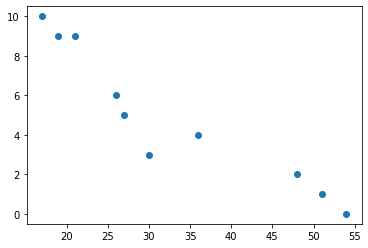

In [9]:
# Your code here.
x=student_data[['X_Age']]
y=student_data['Y_Tardies']
plt.scatter(x,y)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
#Yes, there is a trend. The older the person is, the shorter delay he/she has
#There is a clear realtionship.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

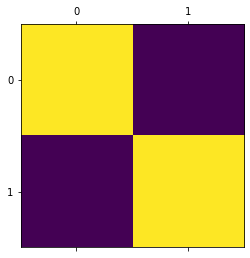

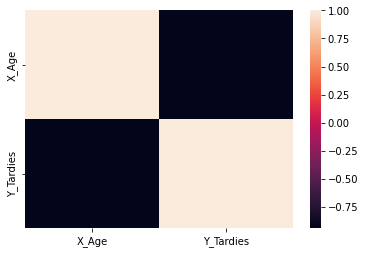

,X_Age,Y_Tardies
X_Age,187.655556,-45.566667
Y_Tardies,-45.566667,12.544444


In [78]:
# Your response here.

#correlation:
    #Option 1:
student_data.corr()
plt.matshow(student_data.corr())
plt.show()
    #Option 2:
#This heatmap() is more visual:
sns.heatmap(student_data.corr())
plt.show()

#covariance:
student_data.cov()


"""
We can see in the correlation matrix that those 2 variables Age and Tardies are not correlated.
However looking into their covariance, we can see there is a relationship between them.


Covariance is a statistical term, defined as a systematic relationship between a pair of random variables in which a 
change in one variable corresponds to an equivalent change in another variable.

The covariance can take any value between -∞ to + ∞, where the negative value is an indicator of negative relationship, 
while a positive value represents the positive relationship.

In this case, cov between variables is -45.566667 which indicates a negative relationship.
"""

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here.
# I'm using a linear regression.
# Why linear? Because looking at the plot below we can see that there a linar tendency in its point cloud. 
# Which means that it can be aproximated by a linear function with form y^=b0+b1x
# In this scenario, my X only has one column so is not multi dimensional object, so we don't need to use a 
# multi lenar regression.

#Features:
x=student_data[['X_Age']]
#I'm trying to predict this variable (label)
y=student_data['Y_Tardies']

Plot your regression model on your scatter plot.

LinearRegression()

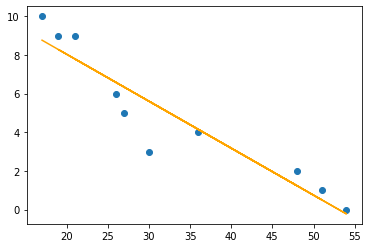

In [17]:
# Your code here.

#Build model:
#############
model = linear_model.LinearRegression()

#Find b0 and b1: y^=b0+b1*x
###########################
result = model.fit(x,y)
display(result)

#Plot the regression line with data points:
###########################################
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y) #together with the points
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
# Above we have obtained the best linear regression for the cloud points we have, the best in the sense that is the one that minimise the error, 
#that is the distance from the blue dots to the orange line
#So we can say that Age is a good predictor of tardiness.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [37]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

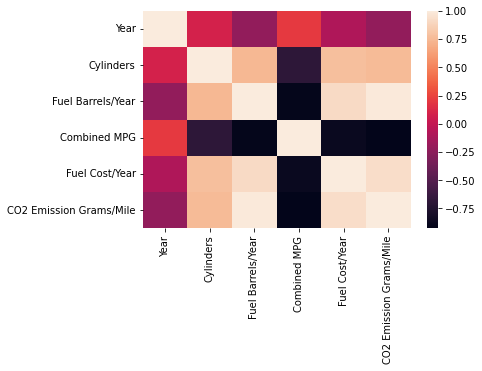

In [30]:
# Your response here. 
x=vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
y=vehicles['CO2 Emission Grams/Mile']

subvehicles =vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']]
#correlation:
subvehicles.corr()
#plt.matshow(subvehicles.corr())
#This heatmap() is more visual:
sns.heatmap(subvehicles.corr())
plt.show()

In [ ]:
#Which variable do you think will be the most important in determining CO2 emissions?
#As we can see in the correlation matrix above, the stronger correlation values are between:
#Cylinders-Fuel Barrels/Year
#Cylinders-Combined MPG
#Cylinders-Fuel Cost/Year
#Cylinders-CO2 Emission Grams/Mile
#Fuel Barrels/Year-Fuel Cost/Year
#Fuel Barrels/Year-CO2 Emission Grams/Mile
#Fuel Cost/Year-CO2 Emission Grams/Mile

#Which provides the least amount of helpful information for determining CO2 emissions?
#There is a strong relationship between all variablles as CO2 Emission Grams/Mile except for Combined MPG. 
#That seems to depend only of Year

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [48]:
# Your response here. 
#We will use a multilinear regression this time because of our X:
X=vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
y=vehicles['CO2 Emission Grams/Mile']

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [50]:
#Build model:
#############
model = linear_model.LinearRegression()

#Find b0 and b1: y^=b0+b1*x
###########################
result = model.fit(X,y)
display(result)

LinearRegression()

In [52]:
#this is the slope B1:
######################
result.coef_

array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

In [53]:
#this is how high B0:
#####################
result.intercept_ 

769.8882836465696

In [55]:
#Coefficient of Determination (R^2):
####################################
result.score(X,y)

0.9808734920269122

In [ ]:
"""
x=vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
y=vehicles['CO2 Emission Grams/Mile']

y^=b0+b1*x
So this will be my multilinear regression:
y^=(769.8882836465696)+(-0.32061673)*('Year')+(1.87879976)*('Cylinders')+(19.05292507)*(Fuel Barrels/Year)
                      +(-3.04039938)*(Combined MPG)+(0.03230948)*(Fuel Cost) + ERROR
                      
The coef of det R^2 says how good our model is. In this case it is 0.9808734920269122, which is an excellent prediction.

b1,b2,b3,b4,etc measure the influence that X=(x0,x1,x2,...) has over y.
Unfortunately we can't know which variable or variables are the most important in our model.
I  can only suppose that those variable with the higher correlation with Y, will be the ones that are more important in 
the regression model. Those are Fuel Barrels/Year and Fuel Cost/Year.


"""

In [58]:
#MSE:
#####
mean_squared_error(result.predict(X),y) 

271.11965507029964

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [59]:
# Your code here.
guests_data = pd.DataFrame({'X_Invited': [1,3,4,6,8,9,11,14], 'Y_Attended': [1,2,4,4,5,7,8,13]})
guests_data

,X_Invited,Y_Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

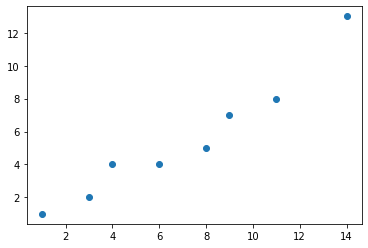

In [62]:
# Your code here.
x=guests_data[['X_Invited']]
y=guests_data['Y_Attended']
#Display OF POINT CLOUD:
########################
plt.scatter(x,y)
plt.show()

#Build model:
#############
model = linear_model.LinearRegression()

#Find b0 and b1: y^=b0+b1*x
###########################
result = model.fit(x,y)

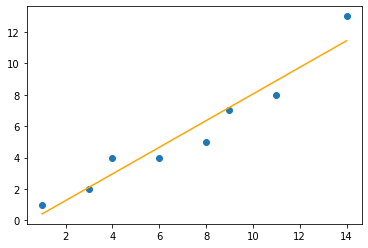

In [69]:
#Plot the regression line with data points:
###########################################
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y) #together with the points
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 
#We can see that maybe the last point of our point cloud could be an outlier since, comparing to the others is
#too far from the line

In [66]:
#this is the slope B1:
######################
result.coef_[0]

0.8484848484848485

In [67]:
#this is how high B0:
#####################
result.intercept_ 


-0.43939393939393945

In [70]:
#Coefficient of Determination (R^2):
####################################
result.score(x,y)
#Our model is quite good:0.9316696375519905

0.9316696375519905

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

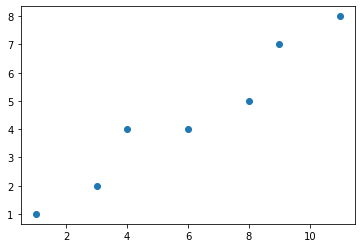

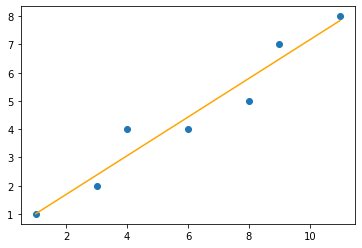

In [71]:
# Your response here. 
#I thin the last point of our point cloud could be an outlier, let see if removing it from our data set makes a big diffence
#in our model:
guests_data = pd.DataFrame({'X_Invited': [1,3,4,6,8,9,11], 'Y_Attended': [1,2,4,4,5,7,8]})

x=guests_data[['X_Invited']]
y=guests_data['Y_Attended']
#Display OF POINT CLOUD:
########################
plt.scatter(x,y)
plt.show()

#Build model:
#############
model = linear_model.LinearRegression()

#Find b0 and b1: y^=b0+b1*x
###########################
result = model.fit(x,y)

#Plot the regression line with data points:
###########################################
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y) #together with the points
plt.show()

In [74]:
#this is how high B0:
#####################
result.intercept_ 


0.32330827067669077

In [75]:
#this is the slope B1:
######################
result.coef_[0]

0.6842105263157896

In [76]:
#Coefficient of Determination (R^2):
####################################
result.score(x,y)
#Previous R^2 value was:0.9316696375519905
#Now is 0.9433811802232854, much more better without that outlier point.

0.9433811802232854

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
"""
We have discovered that removing an outlier point (14,13) gives a much more better linear regression model. 
We can say our model is better, that is, makes a better prediction, because Det. coeff. R^2 is closer to 1.

"""
